<a href="https://colab.research.google.com/github/ugururesin/Deep_Learning_Projects/blob/main/Multivariate_Time_Series_Modeling_via_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTINF LIBRARIRES
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf

In [2]:
mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['axes.grid'] = False

In [3]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00374/energydata_complete.csv')

In [4]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


**Data Set Information:**

The data set is at 10 min for about 4.5 months. The house temperature and humidity conditions were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for 10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters. Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis (rp5.ru), and merged together with the experimental data sets using the date and time column. Two random variables have been included in the data set for testing the regression models and to filter out non predictive attributes (parameters).

For more information about the house, data collection, R scripts and figures, please refer to the paper and to the following github repository:

[Web Link]


**Attribute Information:**  
date time year-month-day hour:minute:second  
Appliances, energy use in Wh  
lights, energy use of light fixtures in the house in Wh  
**T1**, Temperature in kitchen area, in Celsius  
**RH_1**, Humidity in kitchen area, in %  
**T2**, Temperature in living room area, in Celsius  
**RH_2**, Humidity in living room area, in %  
**T3**, Temperature in laundry room area  
**RH_3**, Humidity in laundry room area, in %  
**T4**, Temperature in office room, in Celsius  
**RH_4**, Humidity in office room, in %  
**T5**, Temperature in bathroom, in Celsius  
**RH_5**, Humidity in bathroom, in %  
**T6**, Temperature outside the building (north side), in Celsius  
**RH_6**, Humidity outside the building (north side), in %  
**T7**, Temperature in ironing room , in Celsius  
**RH_7**, Humidity in ironing room, in %  
**T8**, Temperature in teenager room 2, in Celsius  
**RH_8**, Humidity in teenager room 2, in %  
**T9**, Temperature in parents room, in Celsius  
**RH_9**, Humidity in parents room, in %  
**To**, Temperature outside (from Chievres weather station), in Celsius  
**Pressure** (from Chievres weather station), in mm Hg  
**RH_out**, Humidity outside (from Chievres weather station), in %  
**Wind speed** (from Chievres weather station), in m/s  
**Visibility** (from Chievres weather station), in km  
**Tdewpoint** (from Chievres weather station), Â°C  
**rv1**, Random variable 1, nondimensional  
**rv2**, Random variable 2, nondimensional  


Where indicated, hourly data (then interpolated) from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis, rp5.ru. Permission was obtained from Reliable Prognosis for the distribution of the 4.5 months of weather data.


**Relevant Papers:**  
Luis M. Candanedo, Veronique Feldheim, Dominique Deramaix, Data driven prediction models of energy use of appliances in a low-energy house, Energy and Buildings, Volume 140, 1 April 2017, Pages 81-97, ISSN 0378-7788,  
[Web Link].


**Citation Request:**  
Luis M. Candanedo, Veronique Feldheim, Dominique Deramaix, Data driven prediction models of energy use of appliances in a low-energy house, Energy and Buildings, Volume 140, 1 April 2017, Pages 81-97, ISSN 0378-7788,  
[Web Link].

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

### Data Operations

In [6]:
df['date'] = pd.to_datetime(df['date'], infer_datetime_format=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fa826a05a50>,
      dtype=object)

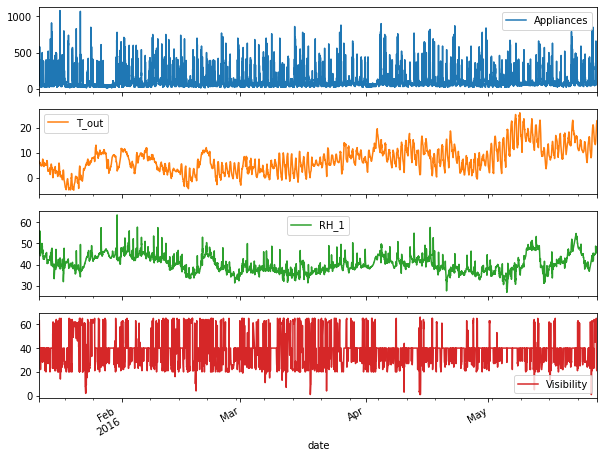

In [7]:
df.set_index('date')[['Appliances', 'T_out', 'RH_1', 'Visibility']].plot(subplots=True)

In [8]:
df_input = df[['Appliances', 'T_out', 'RH_1', 'Visibility']]

In [9]:
df_input.head()

,Appliances,T_out,RH_1,Visibility
0,60,6.600000,47.596667,63.000000
1,60,6.483333,46.693333,59.166667
2,50,6.366667,46.300000,55.333333
3,50,6.250000,46.066667,51.500000
4,60,6.133333,46.333333,47.666667


In [10]:
df_input.describe()

,Appliances,T_out,RH_1,Visibility
count,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,7.411665,40.259739,38.330834
std,102.524891,5.317409,3.979299,11.794719
min,10.000000,-5.000000,27.023333,1.000000
25%,50.000000,3.666667,37.333333,29.000000
50%,60.000000,6.916667,39.656667,40.000000
75%,100.000000,10.408333,43.066667,40.000000
max,1080.000000,26.100000,63.360000,66.000000


In [11]:
df_input.query("Appliances>500")

,Appliances,T_out,RH_1,Visibility
11,580,5.983333,46.396667,40.000000
314,520,2.900000,41.530000,36.333333
392,550,2.033333,43.433333,40.000000
393,690,2.100000,43.766667,40.000000
394,620,2.166667,43.693333,40.000000
...,...,...,...,...
19586,600,20.833333,44.066667,40.000000
19587,520,20.900000,43.366667,40.000000
19684,580,15.900000,47.226667,61.000000
19685,660,16.100000,47.693333,61.000000


The reason of scaling the data before feeding into the neural network model, it provides faster convergence!

In [12]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df_input)

In [13]:
pd.DataFrame(data_scaled).describe()

,0,1,2,3
count,19735.000000,19735.000000,19735.000000,19735.000000
mean,0.081958,0.399089,0.364271,0.574321
std,0.095818,0.170978,0.109512,0.181457
min,0.000000,0.000000,0.000000,0.000000
25%,0.037383,0.278671,0.283735,0.430769
50%,0.046729,0.383173,0.347675,0.600000
75%,0.084112,0.495445,0.441519,0.600000
max,1.000000,1.000000,1.000000,1.000000


In [14]:
features = data_scaled
target = data_scaled[:,0]

In [15]:
TimeseriesGenerator(features, target, length=2, sampling_rate=1, batch_size=1)[0]

(array([[[0.04672897, 0.37299035, 0.56618659, 0.95384615],
         [0.04672897, 0.36923901, 0.54132648, 0.89487179]]]),
 array([0.03738318]))

In [16]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=123, shuffle=False)

In [17]:
print("Train shape: ", x_train.shape)
print("Test shape: ", x_test.shape)

Train shape:  (15788, 4)
Test shape:  (3947, 4)


In [18]:
win_length = 720
batch_size = 32
num_features = 4
train_generator = TimeseriesGenerator(x_train, y_train, length=win_length, sampling_rate=1, batch_size=batch_size)
test_generator = TimeseriesGenerator(x_test, y_test, length=win_length, sampling_rate=1, batch_size=batch_size)

In [19]:
train_generator[0]

(array([[[0.04672897, 0.37299035, 0.56618659, 0.95384615],
         [0.04672897, 0.36923901, 0.54132648, 0.89487179],
         [0.03738318, 0.36548767, 0.53050179, 0.83589744],
         ...,
         [0.06542056, 0.25241158, 0.31584258, 0.79230769],
         [0.05607477, 0.23901393, 0.31309054, 0.72820513],
         [0.06542056, 0.22561629, 0.31107238, 0.66410256]],
 
        [[0.04672897, 0.36923901, 0.54132648, 0.89487179],
         [0.03738318, 0.36548767, 0.53050179, 0.83589744],
         [0.03738318, 0.36173633, 0.52408036, 0.77692308],
         ...,
         [0.05607477, 0.23901393, 0.31309054, 0.72820513],
         [0.06542056, 0.22561629, 0.31107238, 0.66410256],
         [0.06542056, 0.21221865, 0.30923768, 0.6       ]],
 
        [[0.03738318, 0.36548767, 0.53050179, 0.83589744],
         [0.03738318, 0.36173633, 0.52408036, 0.77692308],
         [0.04672897, 0.35798499, 0.53141914, 0.71794872],
         ...,
         [0.06542056, 0.22561629, 0.31107238, 0.66410256],
        

In [20]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.LSTM(128, input_shape=(win_length, num_features), return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.LSTM(128, return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.LSTM(64, return_sequences=False))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(1))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 720, 128)          68096     
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 720, 128)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 720, 128)          131584    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 720, 128)          0         
_________________________________________________________________
dropout (Dropout)            (None, 720, 128)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0

In [22]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2, mode='min')

model.compile(loss = tf.losses.MeanSquaredError(),
              optimizer = tf.optimizers.Adam(),
              metrics = [tf.metrics.MeanAbsoluteError()])

history = model.fit_generator(train_generator, epochs=50,
                              validation_data=test_generator,
                              shuffle=False,
                              callbacks=[early_stopping])

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


471/471 [==============================] - 899s 2s/step - loss: 0.0085 - mean_absolute_error: 0.0512 - val_loss: 0.0058 - val_mean_absolute_error: 0.0499
Epoch 2/50
471/471 [==============================] - 894s 2s/step - loss: 0.0067 - mean_absolute_error: 0.0427 - val_loss: 0.0044 - val_mean_absolute_error: 0.0368
Epoch 3/50
471/471 [==============================] - 892s 2s/step - loss: 0.0049 - mean_absolute_error: 0.0354 - val_loss: 0.0033 - val_mean_absolute_error: 0.0297
Epoch 4/50
471/471 [==============================] - 893s 2s/step - loss: 0.0042 - mean_absolute_error: 0.0317 - val_loss: 0.0032 - val_mean_absolute_error: 0.0283
Epoch 5/50
471/471 [==============================] - 893s 2s/step - loss: 0.0041 - mean_absolute_error: 0.0315 - val_loss: 0.0032 - val_mean_absolute_error: 0.0284
Epoch 6/50
471/471 [==============================] - 893s 2s/step - loss: 0.0041 - mean_absolute_error: 0.0310 - val_loss: 0.0032 - val_mean_absolute_error: 0.0280
Epoch 7/50
471/471 [=

In [23]:
model.evaluate_generator(test_generator, verbose=0)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.0031806044280529022, 0.02848288230597973]

In [24]:
predictions = model.predict_generator(test_generator)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [25]:
predictions.shape[0]

3227

In [26]:
predictions

array([[0.07207845],
       [0.09765545],
       [0.11970159],
       ...,
       [0.08859646],
       [0.25403988],
       [0.26469132]], dtype=float32)